In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
from PIL import Image


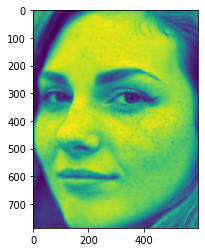

In [28]:
# img = cv2.cvtColor(cv2.imread('testing/25_1_3_first.jpg'), cv2.COLOR_BGR2GRAY)
img_file = Image.open('testing/25_1_3_first.jpg')
img_grey = img_file.convert('L')
plt.imshow(img)
plt.show()

In [29]:
gray_temp_df = pd.DataFrame(data = img)
df_gray = img/255

In [30]:
pca_g = PCA(n_components=50)
pca_g.fit(df_gray)
trans_pca_g = pca_g.transform(df_gray)

In [31]:
print(trans_pca_g.shape)

(787, 50)


In [32]:
print(f"Gray Channel : {sum(pca_g.explained_variance_ratio_)}")

Gray Channel : 0.9975728035094455


<BarContainer object of 50 artists>

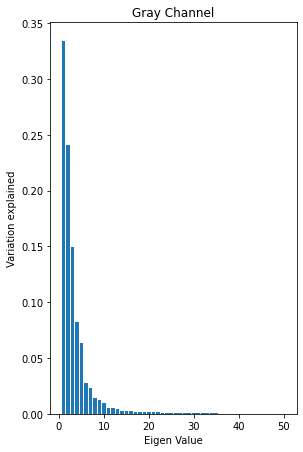

In [33]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Gray Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

In [34]:
g_arr = pca_g.inverse_transform(trans_pca_g)
g_arr.shape

(787, 597)

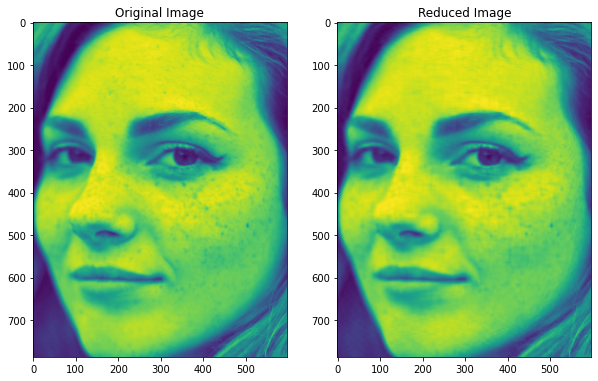

In [38]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(g_arr)
plt.show()